# Prediction of a heart disease (EDA)

In [ ]:
__author__ = "Zhiji Ding"
__copyright__ = "Copyright 2018, Zhiji Ding"
__email__ = "jimmydzj2006@gmail.com"

In [1]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

## Load and inspect the data

In [2]:
# Read in files and print the information
train_feature_df = pd.read_csv('/Users/jimmyding/Downloads/heart_comp/train_values.csv')
train_target_df = pd.read_csv('/Users/jimmyding/Downloads/heart_comp/train_labels.csv')
test_feature_df = pd.read_csv('/Users/jimmyding/Downloads/heart_comp/test_values.csv')

In [3]:
train_feature_df.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [4]:
train_target_df.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [5]:
test_feature_df.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,olalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0
1,z9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0
2,5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1
3,mrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0
4,uki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1


In [6]:
train_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
patient_id                              180 non-null object
slope_of_peak_exercise_st_segment       180 non-null int64
thal                                    180 non-null object
resting_blood_pressure                  180 non-null int64
chest_pain_type                         180 non-null int64
num_major_vessels                       180 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    180 non-null int64
resting_ekg_results                     180 non-null int64
serum_cholesterol_mg_per_dl             180 non-null int64
oldpeak_eq_st_depression                180 non-null float64
sex                                     180 non-null int64
age                                     180 non-null int64
max_heart_rate_achieved                 180 non-null int64
exercise_induced_angina                 180 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 19.8+ KB


In [7]:
train_target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 2 columns):
patient_id               180 non-null object
heart_disease_present    180 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.9+ KB


In [8]:
test_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 14 columns):
patient_id                              90 non-null object
slope_of_peak_exercise_st_segment       90 non-null int64
thal                                    90 non-null object
resting_blood_pressure                  90 non-null int64
chest_pain_type                         90 non-null int64
num_major_vessels                       90 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    90 non-null int64
resting_ekg_results                     90 non-null int64
serum_cholesterol_mg_per_dl             90 non-null int64
oldpeak_eq_st_depression                90 non-null float64
sex                                     90 non-null int64
age                                     90 non-null int64
max_heart_rate_achieved                 90 non-null int64
exercise_induced_angina                 90 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 9.9+ KB


In [9]:
train_feature_df.isnull().any()

patient_id                              False
slope_of_peak_exercise_st_segment       False
thal                                    False
resting_blood_pressure                  False
chest_pain_type                         False
num_major_vessels                       False
fasting_blood_sugar_gt_120_mg_per_dl    False
resting_ekg_results                     False
serum_cholesterol_mg_per_dl             False
oldpeak_eq_st_depression                False
sex                                     False
age                                     False
max_heart_rate_achieved                 False
exercise_induced_angina                 False
dtype: bool

In [10]:
train_target_df.isnull().any()

patient_id               False
heart_disease_present    False
dtype: bool

In [11]:
test_feature_df.isnull().any()

patient_id                              False
slope_of_peak_exercise_st_segment       False
thal                                    False
resting_blood_pressure                  False
chest_pain_type                         False
num_major_vessels                       False
fasting_blood_sugar_gt_120_mg_per_dl    False
resting_ekg_results                     False
serum_cholesterol_mg_per_dl             False
oldpeak_eq_st_depression                False
sex                                     False
age                                     False
max_heart_rate_achieved                 False
exercise_induced_angina                 False
dtype: bool

## Transform some norminal data to categorical

In [12]:
to_category=['thal','chest_pain_type','sex']
for col in to_category:
    train_feature_df[col] = train_feature_df[col].astype('category')
    test_feature_df[col] = test_feature_df[col].astype('category')

In [13]:
train_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
patient_id                              180 non-null object
slope_of_peak_exercise_st_segment       180 non-null int64
thal                                    180 non-null category
resting_blood_pressure                  180 non-null int64
chest_pain_type                         180 non-null category
num_major_vessels                       180 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    180 non-null int64
resting_ekg_results                     180 non-null int64
serum_cholesterol_mg_per_dl             180 non-null int64
oldpeak_eq_st_depression                180 non-null float64
sex                                     180 non-null category
age                                     180 non-null int64
max_heart_rate_achieved                 180 non-null int64
exercise_induced_angina                 180 non-null int64
dtypes: category(3), float64(1), int64(9), object(1)
memo

In [14]:
train_feature_df.describe(include = [np.number])

,slope_of_peak_exercise_st_segment,resting_blood_pressure,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,age,max_heart_rate_achieved,exercise_induced_angina
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,0.694444,0.161111,1.050000,249.211111,1.010000,54.811111,149.483333,0.316667
std,0.618838,17.010443,0.969347,0.368659,0.998742,52.717969,1.121357,9.334737,22.063513,0.466474
min,1.000000,94.000000,0.000000,0.000000,0.000000,126.000000,0.000000,29.000000,96.000000,0.000000
25%,1.000000,120.000000,0.000000,0.000000,0.000000,213.750000,0.000000,48.000000,132.000000,0.000000
50%,1.000000,130.000000,0.000000,0.000000,2.000000,245.500000,0.800000,55.000000,152.000000,0.000000
75%,2.000000,140.000000,1.000000,0.000000,2.000000,281.250000,1.600000,62.000000,166.250000,1.000000
max,3.000000,180.000000,3.000000,1.000000,2.000000,564.000000,6.200000,77.000000,202.000000,1.000000


In [15]:
train_feature_df.describe(include = ['category'])

,thal,chest_pain_type,sex
count,180,180,180
unique,3,4,2
top,normal,4,1
freq,98,82,124


In [16]:
# Merge the features and salaries on jobId, delete original file to save memory
train_df = pd.merge(train_feature_df, train_target_df, on='patient_id')

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 15 columns):
patient_id                              180 non-null object
slope_of_peak_exercise_st_segment       180 non-null int64
thal                                    180 non-null category
resting_blood_pressure                  180 non-null int64
chest_pain_type                         180 non-null category
num_major_vessels                       180 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    180 non-null int64
resting_ekg_results                     180 non-null int64
serum_cholesterol_mg_per_dl             180 non-null int64
oldpeak_eq_st_depression                180 non-null float64
sex                                     180 non-null category
age                                     180 non-null int64
max_heart_rate_achieved                 180 non-null int64
exercise_induced_angina                 180 non-null int64
heart_disease_present                   180 non-null int6

In [18]:
train_df.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


# EDA

In [19]:
train_df.shape

(180, 15)

In [20]:
positive_rate = train_df['heart_disease_present'].value_counts()
positive_rate

0    100
1     80
Name: heart_disease_present, dtype: int64

#### The dataset is somewhat balanced

In [21]:
train_df.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,0.694444,0.161111,1.050000,249.211111,1.010000,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.969347,0.368659,0.998742,52.717969,1.121357,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,0.000000,0.000000,0.000000,126.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,0.000000,0.000000,0.000000,213.750000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,0.000000,0.000000,2.000000,245.500000,0.800000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,1.000000,0.000000,2.000000,281.250000,1.600000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,3.000000,1.000000,2.000000,564.000000,6.200000,77.000000,202.000000,1.000000,1.000000


In [22]:
# Display the mean summary of patients (heart disease present or not). 
heart_desease_Summary = train_df.groupby('heart_disease_present')
heart_desease_Summary.mean()


,slope_of_peak_exercise_st_segment,resting_blood_pressure,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,age,max_heart_rate_achieved,exercise_induced_angina
heart_disease_present,,,,,,,,,,
0,1.3600,130.12,0.33,0.1600,0.9200,245.46,0.62700,53.66,156.87,0.13
1,1.7875,132.80,1.15,0.1625,1.2125,253.90,1.48875,56.25,140.25,0.55


## Correlation matrix

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

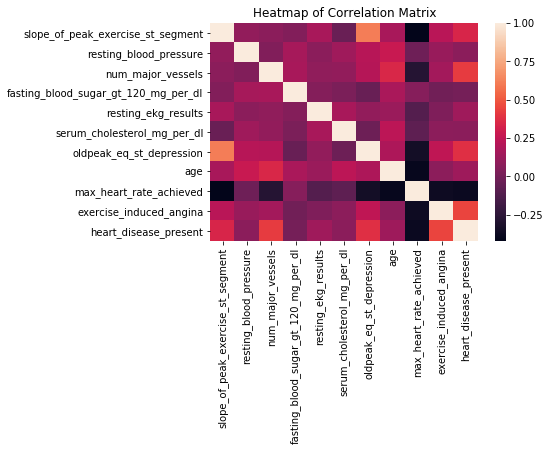

In [23]:
corr = train_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')
#corr

## Distribution of parameters with no significant difference between with or w/o heart desease 
- resting_blood_pressure
- fasting_blood_sugar_gt_120_mg_per_dl
- serum_cholesterol_mg_per_dl
- max_heart_rate_achieved

Text(0, 0.5, 'Patient Count')

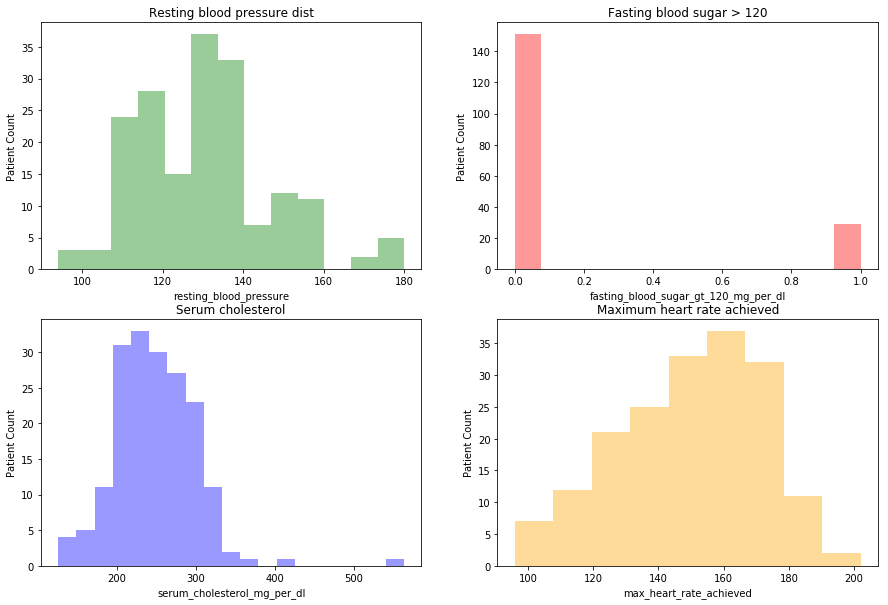

In [24]:
# Set up the matplotlib figure
f, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Graph Employee Satisfaction
sns.distplot(train_df['resting_blood_pressure'], kde=False, color="g", ax=axes[0,0]).set_title('Resting blood pressure dist')
axes[0,0].set_ylabel('Patient Count')

# Graph Employee Evaluation
sns.distplot(train_df['fasting_blood_sugar_gt_120_mg_per_dl'], kde=False, color="r", ax=axes[0,1]).set_title('Fasting blood sugar > 120')
axes[0,1].set_ylabel('Patient Count')

# Graph Employee Average Monthly Hours
sns.distplot(train_df['serum_cholesterol_mg_per_dl'], kde=False, color="b", ax=axes[1,0]).set_title('Serum cholesterol')
axes[1,0].set_ylabel('Patient Count')

# Graph Employee Average Monthly Hours
sns.distplot(train_df['max_heart_rate_achieved'], kde=False, color="orange", ax=axes[1,1]).set_title('Maximum heart rate achieved')
axes[1,1].set_ylabel('Patient Count')


## Age and gender

Text(0, 0.5, 'Patient Count')

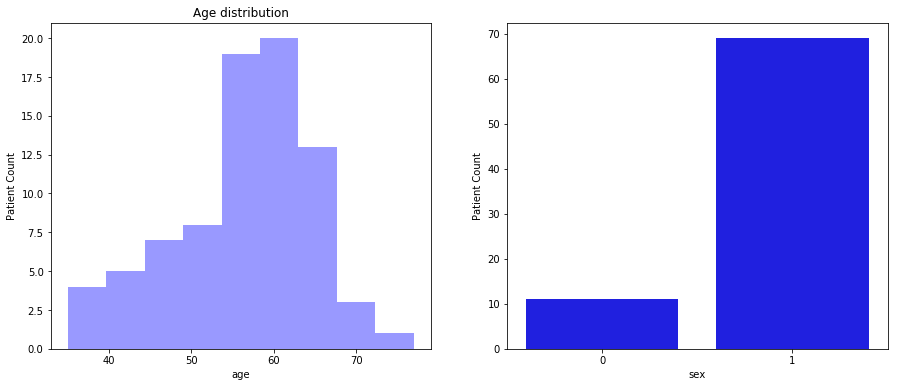

In [25]:
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.distplot(train_df[train_df['heart_disease_present']==1]['age'], kde=False, color="b", ax=axes[0]).set_title('Age distribution')
axes[0].set_ylabel('Patient Count')

hd_sex=pd.DataFrame(train_df.groupby(['sex'])['heart_disease_present'].sum()).reset_index()

sns.barplot(x='sex', y='heart_disease_present', data=hd_sex,
            label="Total", color="b")
axes[1].set_ylabel('Patient Count')

## KDE_rest blood pressure

Text(0.5, 1.0, 'Patient resting blood pressure - with V.S. w/o heart desease')

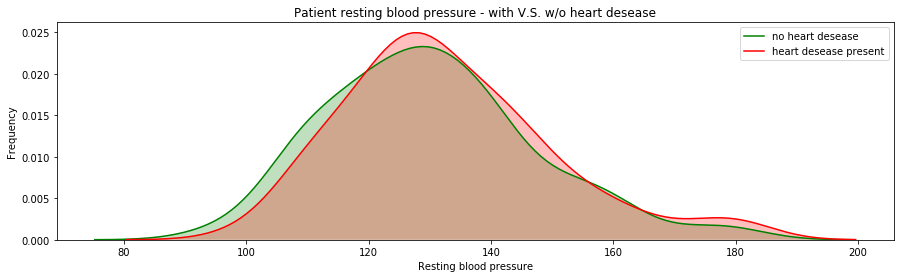

In [26]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(train_df.loc[(train_df['heart_disease_present'] == 0),'resting_blood_pressure'] , color='g',shade=True, label='no heart desease')
ax=sns.kdeplot(train_df.loc[(train_df['heart_disease_present'] == 1),'resting_blood_pressure'] , color='r',shade=True, label='heart desease present')
ax.set(xlabel='Resting blood pressure', ylabel='Frequency')
plt.title('Patient resting blood pressure - with V.S. w/o heart desease')


## KDE_ST depression

Text(0.5, 1.0, 'Patient ST depression - with V.S. w/o heart desease')

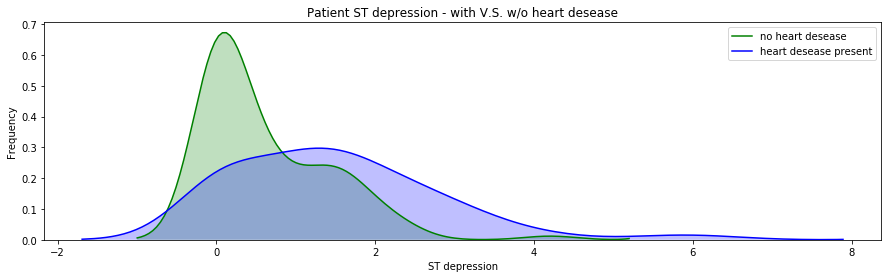

In [27]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(train_df.loc[(train_df['heart_disease_present'] == 0),'oldpeak_eq_st_depression'] , color='g',shade=True, label='no heart desease')
ax=sns.kdeplot(train_df.loc[(train_df['heart_disease_present'] == 1),'oldpeak_eq_st_depression'] , color='b',shade=True, label='heart desease present')
ax.set(xlabel='ST depression', ylabel='Frequency')
plt.title('Patient ST depression - with V.S. w/o heart desease')

## KDE_serum cholestrol

Text(0.5, 1.0, 'Patient serum cholestrol - with V.S. w/o heart desease')

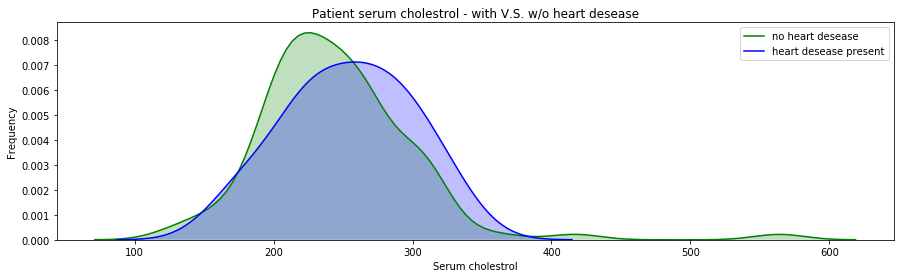

In [28]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(train_df.loc[(train_df['heart_disease_present'] == 0),'serum_cholesterol_mg_per_dl'] , color='g',shade=True, label='no heart desease')
ax=sns.kdeplot(train_df.loc[(train_df['heart_disease_present'] == 1),'serum_cholesterol_mg_per_dl'] , color='b',shade=True, label='heart desease present')
ax.set(xlabel='Serum cholestrol', ylabel='Frequency')
plt.title('Patient serum cholestrol - with V.S. w/o heart desease')

From above EDA, it seems that exercise induced parameters differs more between patient with or w/o heart desease.

# Pre-processing data
- One-hot encoding using get_dummies()
- Separate numeric variables and then concatenate with the encoded ones

In [29]:
train_df.columns.values.tolist()

['patient_id',
 'slope_of_peak_exercise_st_segment',
 'thal',
 'resting_blood_pressure',
 'chest_pain_type',
 'num_major_vessels',
 'fasting_blood_sugar_gt_120_mg_per_dl',
 'resting_ekg_results',
 'serum_cholesterol_mg_per_dl',
 'oldpeak_eq_st_depression',
 'sex',
 'age',
 'max_heart_rate_achieved',
 'exercise_induced_angina',
 'heart_disease_present']

In [30]:
cat_var = ['thal','chest_pain_type','sex']
num_var = ['patient_id',
 'slope_of_peak_exercise_st_segment',
 'resting_blood_pressure',
 'num_major_vessels',
 'fasting_blood_sugar_gt_120_mg_per_dl',
 'resting_ekg_results',
 'serum_cholesterol_mg_per_dl',
 'oldpeak_eq_st_depression',
 'age',
 'max_heart_rate_achieved',
 'exercise_induced_angina',
 'heart_disease_present']
categorical_df = pd.get_dummies(train_df[cat_var], drop_first=True)
numerical_df = train_df[num_var]

new_train_df = pd.concat([categorical_df,numerical_df], axis=1)
new_train_df.head()

,thal_normal,thal_reversible_defect,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,sex_1,patient_id,slope_of_peak_exercise_st_segment,resting_blood_pressure,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,0,1,0,0,1,0z64un,1,128,0,0,2,308,0.0,45,170,0,0
1,1,0,0,1,0,0,ryoo3j,2,110,0,0,0,214,1.6,54,158,0,0
2,1,0,0,0,1,1,yt1s1x,1,125,3,0,2,304,0.0,77,162,1,1
3,0,1,0,0,1,1,l2xjde,1,152,0,0,0,223,0.0,40,181,0,1
4,0,1,0,0,0,1,oyt4ek,3,178,0,0,2,270,4.2,59,145,0,0


In [31]:
new_train_df.shape

(180, 18)

From EDA we know this is a well balanced dataset (80/100) thus no action is required for imbalanced data treatment.

## Train the following three models:
- Logistic regression
- Random forest
- Support vector machine
- Gradient boosted tree
- Multi-layer perceptron

## Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss

#from sklearn.metrics import roc_auc_score
#from sklearn.metrics import accuracy_score


# Create a pipeline that standardizes, then runs logistic regression
pipelinelr = Pipeline([('standardizer',StandardScaler()),('lr',LogisticRegression())])

# define training set
X=new_train_df.loc[:,~new_train_df.columns.isin(['patient_id', 'heart_disease_present'])]
y=new_train_df['heart_disease_present']


In [33]:
import warnings
warnings.filterwarnings("ignore")

# Using grid search to train logistic model

param_grid = {
    'lr__tol':[.005,.0040],
    'lr__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

logistic_model = GridSearchCV(pipelinelr, param_grid, iid=False, cv=10, scoring="neg_log_loss")
logistic_model.fit(X, y)

print("Best parameter (CV logloss=%0.3f):" % logistic_model.best_score_)
print(logistic_model.best_params_)

Best parameter (CV logloss=-0.433):
{'lr__solver': 'sag', 'lr__tol': 0.005}


## Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Create a pipeline that standardizes, then runs logistic regression
pipelinerf = Pipeline([('standardizer',StandardScaler()),('rf',RandomForestClassifier())])

In [35]:
param_grid = {
    'rf__n_estimators':[100,150,200],
    'rf__max_depth':[5,10,None],
    'rf__min_samples_split': [4,10,14],
    'rf__min_samples_leaf': [2,3,5]
}

rf_model = GridSearchCV(pipelinerf, param_grid, iid=False, cv=10, scoring="neg_log_loss")
rf_model.fit(X, y)

print("Best parameter (CV logloss=%0.3f):" % rf_model.best_score_)
print(rf_model.best_params_)

Best parameter (CV logloss=-0.410):
{'rf__max_depth': 5, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 4, 'rf__n_estimators': 100}


## Support Vector Machine

In [36]:
from sklearn.svm import SVC


pipelinesvc = Pipeline([('standardizer',StandardScaler()),('svc',SVC(probability=True))])

In [38]:
param_grid = {
    'svc__C':[1,10,100],
    'svc__gamma':[1,0.1,0.001,0.0001],
    'svc__kernel':['linear','rbf', 'sigmoid','poly'],
    'svc__tol':[0.00005,0.0001,0.0005],
}

svc_model = GridSearchCV(pipelinesvc, param_grid, iid=False, cv=80, scoring="neg_log_loss")
svc_model.fit(X, y)

print("Best parameter (CV logloss=%0.3f):" % svc_model.best_score_)
print(svc_model.best_params_)

Best parameter (CV logloss=-0.405):
{'svc__C': 10, 'svc__gamma': 0.0001, 'svc__kernel': 'rbf', 'svc__tol': 5e-05}


## Gradient boosted tree

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

pipelinegbc = Pipeline([('standardizer',StandardScaler()),('gbc',GradientBoostingClassifier())])

In [40]:
param_grid = {
    'gbc__loss':['deviance','exponential'],
    'gbc__learning_rate': [0.1,0.15,0.2],
    'gbc__n_estimators': [10,40,90],
    'gbc__max_depth': [2,4,6]
}

gbc_model = GridSearchCV(pipelinegbc, param_grid, iid=False, cv=5, scoring="neg_log_loss")
gbc_model.fit(X, y)

print("Best parameter (CV logloss=%0.3f):" % gbc_model.best_score_)
print(gbc_model.best_params_)

Best parameter (CV logloss=-0.455):
{'gbc__learning_rate': 0.15, 'gbc__loss': 'deviance', 'gbc__max_depth': 2, 'gbc__n_estimators': 40}


## Multi-layer perceptron

In [41]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.neural_network import MLPClassifier

pipelinemlp = Pipeline([('standardizer',StandardScaler()),
                     ('mlp', MLPClassifier()),
])
param_grid = {
    'mlp__solver': ['lbfgs', 'sgd', 'adam'],
    'mlp__tol': [5,0.001,1],
    'mlp__activation':['identity', 'logistic', 'tanh', 'relu']
}

mlp_model = GridSearchCV(pipelinemlp, param_grid, iid=False, cv=5, scoring="neg_log_loss")
mlp_model.fit(X, y)

print("Best parameter (CV logloss=%0.3f):" % mlp_model.best_score_)
print(mlp_model.best_params_)

Best parameter (CV logloss=-0.408):
{'mlp__activation': 'logistic', 'mlp__solver': 'adam', 'mlp__tol': 0.001}


## Conclusion
The SVC model returns a lowest log-loss value thus will be used for the prediction

In [42]:
test_feature_df.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,olalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0
1,z9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0
2,5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1
3,mrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0
4,uki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1


In [43]:
test_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 14 columns):
patient_id                              90 non-null object
slope_of_peak_exercise_st_segment       90 non-null int64
thal                                    90 non-null category
resting_blood_pressure                  90 non-null int64
chest_pain_type                         90 non-null category
num_major_vessels                       90 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    90 non-null int64
resting_ekg_results                     90 non-null int64
serum_cholesterol_mg_per_dl             90 non-null int64
oldpeak_eq_st_depression                90 non-null float64
sex                                     90 non-null category
age                                     90 non-null int64
max_heart_rate_achieved                 90 non-null int64
exercise_induced_angina                 90 non-null int64
dtypes: category(3), float64(1), int64(9), object(1)
memory usage: 8.5+ K

Before model prediction, we must do the same encoding to the test data

In [44]:
cat_var = ['thal','chest_pain_type','sex']
num_var = ['patient_id',
 'slope_of_peak_exercise_st_segment',
 'resting_blood_pressure',
 'num_major_vessels',
 'fasting_blood_sugar_gt_120_mg_per_dl',
 'resting_ekg_results',
 'serum_cholesterol_mg_per_dl',
 'oldpeak_eq_st_depression',
 'age',
 'max_heart_rate_achieved',
 'exercise_induced_angina',
 ]
categorical_df = pd.get_dummies(test_feature_df[cat_var], drop_first=True)
numerical_df = test_feature_df[num_var]

new_test_df = pd.concat([categorical_df,numerical_df], axis=1)
new_test_df.head()

,thal_normal,thal_reversible_defect,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,sex_1,patient_id,slope_of_peak_exercise_st_segment,resting_blood_pressure,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,age,max_heart_rate_achieved,exercise_induced_angina
0,0,1,0,0,0,1,olalu7,2,170,0,0,2,288,0.2,59,159,0
1,1,0,0,0,1,0,z9n6mx,1,138,0,0,0,183,1.4,35,182,0
2,0,1,0,0,1,1,5k4413,2,120,0,0,2,177,2.5,43,120,1
3,1,0,0,1,0,0,mrg7q5,1,102,1,0,0,318,0.0,60,160,0
4,1,0,0,0,1,1,uki4do,2,138,1,0,2,166,3.6,61,125,1


In [45]:
new_test_df=new_test_df.loc[:,new_test_df.columns != 'patient_id']
new_test_df.head()

,thal_normal,thal_reversible_defect,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,sex_1,slope_of_peak_exercise_st_segment,resting_blood_pressure,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,age,max_heart_rate_achieved,exercise_induced_angina
0,0,1,0,0,0,1,2,170,0,0,2,288,0.2,59,159,0
1,1,0,0,0,1,0,1,138,0,0,0,183,1.4,35,182,0
2,0,1,0,0,1,1,2,120,0,0,2,177,2.5,43,120,1
3,1,0,0,1,0,0,1,102,1,0,0,318,0.0,60,160,0
4,1,0,0,0,1,1,2,138,1,0,2,166,3.6,61,125,1


## Prediction with SVC model

In [46]:
results_svc= pd.DataFrame(columns=['patient_id','heart_disease_present'])
results_svc['patient_id']=test_feature_df['patient_id']
results_svc['heart_disease_present'] = new_test_df.apply(lambda x: svc_model.predict_proba(x.values.reshape(1,-1))[0,1], axis=1)
results_svc.head()

,patient_id,heart_disease_present
0,olalu7,0.689568
1,z9n6mx,0.137772
2,5k4413,0.963921
3,mrg7q5,0.059283
4,uki4do,0.891173


In [ ]:
results.to_csv('/Users/jimmyding/Downloads/heart_comp/results.csv',index=False)

## Prediction with Random Forest

In [47]:
results_rf= pd.DataFrame(columns=['patient_id','heart_disease_present'])
results_rf['patient_id']=test_feature_df['patient_id']
results_rf['heart_disease_present'] = new_test_df.apply(lambda x: rf_model.predict_proba(x.values.reshape(1,-1))[0,1], axis=1)
results_svc.head()

,patient_id,heart_disease_present
0,olalu7,0.689568
1,z9n6mx,0.137772
2,5k4413,0.963921
3,mrg7q5,0.059283
4,uki4do,0.891173


In [ ]:
results_rf.to_csv('/Users/jimmyding/Downloads/heart_comp/results_rf.csv',index=False)